In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from tqdm import tqdm_notebook as tqdm

from data_manager import DataManager
from utils import *

In [63]:
FEATURE_GENERATION = '7gen'
CITY = 'spb'

In [64]:
dm_filename = './{}/dm_{}.pickle'.format(FEATURE_GENERATION, CITY)
if not os.path.exists(dm_filename):
    dm = DataManager(city_name=CITY, n_stations=2)
    with open(dm_filename, 'wb') as f:
        pickle.dump(dm, f)
else:
    with open(dm_filename, 'rb') as f:
        dm = pickle.load(f)

X, y, block_ids = dm.X_train, dm.y_train, dm.train_block_ids
X_test, test_block_ids = dm.X_test, dm.test_block_ids

in_train = block_ids['hours_since'] <= np.percentile(block_ids['hours_since'], 85)  #leave last 15% for validation
X_train, y_train = X[in_train], y[in_train]
X_val, y_val = X[~in_train], y[~in_train]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

Loading train df...
Loading train netatmo df...
Preprocessing train netatmo df...
Extracting features...


100%|██████████| 32803/32803 [16:47<00:00, 27.47it/s]


Loading test df...
Loading test netatmo df
Extracting features...


100%|██████████| 10145/10145 [06:18<00:00, 26.82it/s]


Postprocessing nans...


((28041, 260), (4762, 260), (28041,), (4762,))

In [4]:
cat_features_idx = [idx for idx, col in enumerate(X.columns) if col.endswith('_cat') and idx not in [64, 66]]
cat_features_idx

[18, 19, 38, 39, 49, 50, 51, 52, 71, 72, 146, 147, 196, 197]

In [5]:
model = CatBoostClassifier(random_seed=1,
                           thread_count=8,
                           eval_metric='AUC',
                           verbose=True) \
            .fit(X_train, y_train, eval_set=(X_val, y_val))

Borders for float features generated
feature 146 is redundant categorical feature, skipping it
0:	learn 0.5753220299	test 0.5453285177	bestTest 0.5453285177		total: 226ms	remaining: 1m 52s
1:	learn 0.6049143004	test 0.5625332297	bestTest 0.5625332297		total: 382ms	remaining: 1m 35s
2:	learn 0.6279704525	test 0.5864920082	bestTest 0.5864920082		total: 521ms	remaining: 1m 26s
3:	learn 0.6270476908	test 0.5891553221	bestTest 0.5891553221		total: 578ms	remaining: 1m 11s
4:	learn 0.6271813032	test 0.594748728	bestTest 0.594748728		total: 706ms	remaining: 1m 9s
5:	learn 0.6280485518	test 0.5894989604	bestTest 0.594748728		total: 793ms	remaining: 1m 5s
6:	learn 0.633726551	test 0.5862181788	bestTest 0.594748728		total: 909ms	remaining: 1m 4s
7:	learn 0.6436181817	test 0.5764336555	bestTest 0.594748728		total: 1.04s	remaining: 1m 4s
8:	learn 0.6444885468	test 0.5774876048	bestTest 0.594748728		total: 1.18s	remaining: 1m 4s
9:	learn 0.6444885468	test 0.5774876048	bestTest 0.594748728		total: 1.

89:	learn 0.7971831684	test 0.5415846941	bestTest 0.594748728		total: 12.2s	remaining: 55.6s
90:	learn 0.7972295436	test 0.5418310231	bestTest 0.594748728		total: 12.4s	remaining: 55.7s
91:	learn 0.7976389767	test 0.5416909352	bestTest 0.594748728		total: 12.5s	remaining: 55.6s
92:	learn 0.7975689736	test 0.5407234831	bestTest 0.594748728		total: 12.7s	remaining: 55.4s
93:	learn 0.7988693934	test 0.5429606574	bestTest 0.594748728		total: 12.8s	remaining: 55.3s
94:	learn 0.7997495061	test 0.5448175262	bestTest 0.594748728		total: 13s	remaining: 55.3s
95:	learn 0.8000790953	test 0.5450967617	bestTest 0.594748728		total: 13.1s	remaining: 55.2s
96:	learn 0.8003131732	test 0.5443808095	bestTest 0.594748728		total: 13.3s	remaining: 55.1s
97:	learn 0.8002874958	test 0.5449947514	bestTest 0.594748728		total: 13.5s	remaining: 55.2s
98:	learn 0.8013573269	test 0.5487470366	bestTest 0.594748728		total: 13.6s	remaining: 55.1s
99:	learn 0.8018419461	test 0.5486816937	bestTest 0.594748728		total: 13

177:	learn 0.8222445317	test 0.5643687093	bestTest 0.594748728		total: 25.4s	remaining: 45.9s
178:	learn 0.822381032	test 0.5644721298	bestTest 0.594748728		total: 25.5s	remaining: 45.8s
179:	learn 0.8225137044	test 0.5648270503	bestTest 0.594748728		total: 25.6s	remaining: 45.6s
180:	learn 0.8227143644	test 0.5649577363	bestTest 0.594748728		total: 25.8s	remaining: 45.4s
181:	learn 0.8227812003	test 0.5647706391	bestTest 0.594748728		total: 25.9s	remaining: 45.3s
182:	learn 0.8235594671	test 0.5670186256	bestTest 0.594748728		total: 26.1s	remaining: 45.2s
183:	learn 0.8239669693	test 0.5678356478	bestTest 0.594748728		total: 26.2s	remaining: 45s
184:	learn 0.8240073486	test 0.5677275264	bestTest 0.594748728		total: 26.3s	remaining: 44.8s
185:	learn 0.8244034857	test 0.5684091617	bestTest 0.594748728		total: 26.6s	remaining: 44.9s
186:	learn 0.8244334823	test 0.5684223244	bestTest 0.594748728		total: 26.8s	remaining: 44.9s
187:	learn 0.8248496905	test 0.568511172	bestTest 0.594748728		

265:	learn 0.8484308411	test 0.5919829337	bestTest 0.594748728		total: 38.3s	remaining: 33.7s
266:	learn 0.8484904107	test 0.5922466561	bestTest 0.594748728		total: 38.4s	remaining: 33.5s
267:	learn 0.84875833	test 0.5926448252	bestTest 0.594748728		total: 38.6s	remaining: 33.4s
268:	learn 0.8487791802	test 0.5925992261	bestTest 0.594748728		total: 38.8s	remaining: 33.3s
269:	learn 0.8490972857	test 0.5935572764	bestTest 0.594748728		total: 38.9s	remaining: 33.1s
270:	learn 0.8495035515	test 0.5943484435	bestTest 0.594748728		total: 39s	remaining: 33s
271:	learn 0.8496592252	test 0.5944645566	bestTest 0.594748728		total: 39.2s	remaining: 32.8s
272:	learn 0.8498973851	test 0.5944626762	bestTest 0.594748728		total: 39.3s	remaining: 32.7s
273:	learn 0.8499382217	test 0.5944734884	bestTest 0.594748728		total: 39.5s	remaining: 32.6s
274:	learn 0.8500659991	test 0.5945886613	bestTest 0.594748728		total: 39.6s	remaining: 32.4s
275:	learn 0.8504041757	test 0.5951767481	bestTest 0.5951767481		t

353:	learn 0.8662769636	test 0.6034630838	bestTest 0.6034884688		total: 50.6s	remaining: 20.9s
354:	learn 0.8667884459	test 0.6039665538	bestTest 0.6039665538		total: 50.7s	remaining: 20.7s
355:	learn 0.8668159526	test 0.6039609127	bestTest 0.6039665538		total: 50.9s	remaining: 20.6s
356:	learn 0.8669228798	test 0.6037399688	bestTest 0.6039665538		total: 51s	remaining: 20.4s
357:	learn 0.867116443	test 0.6039077921	bestTest 0.6039665538		total: 51.1s	remaining: 20.3s
358:	learn 0.8672802806	test 0.603992879	bestTest 0.603992879		total: 51.3s	remaining: 20.1s
359:	learn 0.867364901	test 0.604007922	bestTest 0.604007922		total: 51.4s	remaining: 20s
360:	learn 0.867652993	test 0.6042063014	bestTest 0.6042063014		total: 51.5s	remaining: 19.8s
361:	learn 0.8677916952	test 0.6044888275	bestTest 0.6044888275		total: 51.6s	remaining: 19.7s
362:	learn 0.8679525856	test 0.6044498098	bestTest 0.6044888275		total: 51.8s	remaining: 19.5s
363:	learn 0.8680491809	test 0.6044328864	bestTest 0.60448882

441:	learn 0.8834864178	test 0.6161786392	bestTest 0.6161786392		total: 1m 2s	remaining: 8.24s
442:	learn 0.8835963599	test 0.6161377411	bestTest 0.6161786392		total: 1m 2s	remaining: 8.1s
443:	learn 0.8835799812	test 0.6161490234	bestTest 0.6161786392		total: 1m 3s	remaining: 7.96s
444:	learn 0.883693548	test 0.6162886411	bestTest 0.6162886411		total: 1m 3s	remaining: 7.81s
445:	learn 0.8838400076	test 0.6163521037	bestTest 0.6163521037		total: 1m 3s	remaining: 7.67s
446:	learn 0.8839473583	test 0.6161518439	bestTest 0.6163521037		total: 1m 3s	remaining: 7.52s
447:	learn 0.8840509996	test 0.615845343	bestTest 0.6163521037		total: 1m 3s	remaining: 7.38s
448:	learn 0.8842057417	test 0.6161114159	bestTest 0.6163521037		total: 1m 3s	remaining: 7.24s
449:	learn 0.8842635667	test 0.6162726579	bestTest 0.6163521037		total: 1m 3s	remaining: 7.1s
450:	learn 0.8843483565	test 0.6162237682	bestTest 0.6163521037		total: 1m 4s	remaining: 6.96s
451:	learn 0.884393834	test 0.6163328299	bestTest 0.61

In [65]:
model = CatBoostClassifier(iterations=2000,
                           depth=6,
                           loss_function='Logloss',
                           learning_rate=0.02,
                           thread_count=6,
                           use_best_model=True,
                           eval_metric='AUC',
                           l2_leaf_reg=20,
                           random_seed=1,
                           verbose=True) \
            .fit(X_train, y_train, eval_set=(X_val, y_val))

Borders for float features generated
0:	learn 0.5397138633	test 0.480932308	bestTest 0.480932308		total: 70.7ms	remaining: 2m 21s
1:	learn 0.5722324891	test 0.4946291833	bestTest 0.4946291833		total: 141ms	remaining: 2m 20s
2:	learn 0.5815806169	test 0.5129623545	bestTest 0.5129623545		total: 205ms	remaining: 2m 16s
3:	learn 0.5861453739	test 0.5361602868	bestTest 0.5361602868		total: 268ms	remaining: 2m 13s
4:	learn 0.586977172	test 0.5337324896	bestTest 0.5361602868		total: 331ms	remaining: 2m 11s
5:	learn 0.6209173894	test 0.529761611	bestTest 0.5361602868		total: 393ms	remaining: 2m 10s
6:	learn 0.6258712798	test 0.5356744453	bestTest 0.5361602868		total: 460ms	remaining: 2m 11s
7:	learn 0.6242475207	test 0.5495729907	bestTest 0.5495729907		total: 538ms	remaining: 2m 13s
8:	learn 0.6249236537	test 0.5450022729	bestTest 0.5495729907		total: 610ms	remaining: 2m 14s
9:	learn 0.6323800439	test 0.5364503344	bestTest 0.5495729907		total: 694ms	remaining: 2m 18s
10:	learn 0.6394796685	tes

89:	learn 0.6984486188	test 0.5472920977	bestTest 0.5495729907		total: 6.17s	remaining: 2m 10s
90:	learn 0.6990395894	test 0.5473254743	bestTest 0.5495729907		total: 6.25s	remaining: 2m 11s
91:	learn 0.6998444991	test 0.5503115074	bestTest 0.5503115074		total: 6.32s	remaining: 2m 11s
92:	learn 0.7005668887	test 0.5519432014	bestTest 0.5519432014		total: 6.39s	remaining: 2m 11s
93:	learn 0.7008264069	test 0.5515205875	bestTest 0.5519432014		total: 6.47s	remaining: 2m 11s
94:	learn 0.7013538784	test 0.5520348696	bestTest 0.5520348696		total: 6.54s	remaining: 2m 11s
95:	learn 0.7020575688	test 0.5525270574	bestTest 0.5525270574		total: 6.62s	remaining: 2m 11s
96:	learn 0.7025001489	test 0.5543825159	bestTest 0.5543825159		total: 6.7s	remaining: 2m 11s
97:	learn 0.7048999051	test 0.5562765221	bestTest 0.5562765221		total: 6.77s	remaining: 2m 11s
98:	learn 0.705068824	test 0.5565341332	bestTest 0.5565341332		total: 6.84s	remaining: 2m 11s
99:	learn 0.7061471408	test 0.5589452421	bestTest 0.

176:	learn 0.7480774782	test 0.6007849619	bestTest 0.6007849619		total: 12.7s	remaining: 2m 10s
177:	learn 0.7486289842	test 0.599864049	bestTest 0.6007849619		total: 12.7s	remaining: 2m 10s
178:	learn 0.7488596746	test 0.6006415834	bestTest 0.6007849619		total: 12.8s	remaining: 2m 10s
179:	learn 0.7495895337	test 0.6030470512	bestTest 0.6030470512		total: 12.9s	remaining: 2m 10s
180:	learn 0.7501294542	test 0.6028641849	bestTest 0.6030470512		total: 12.9s	remaining: 2m 10s
181:	learn 0.7504262691	test 0.6030620942	bestTest 0.6030620942		total: 13s	remaining: 2m 10s
182:	learn 0.7507509803	test 0.6042913883	bestTest 0.6042913883		total: 13.1s	remaining: 2m 10s
183:	learn 0.7519082942	test 0.6054553395	bestTest 0.6054553395		total: 13.2s	remaining: 2m 9s
184:	learn 0.7520389171	test 0.6054952974	bestTest 0.6054952974		total: 13.2s	remaining: 2m 9s
185:	learn 0.7525566833	test 0.6060185113	bestTest 0.6060185113		total: 13.3s	remaining: 2m 9s
186:	learn 0.752449231	test 0.606409629	bestTe

264:	learn 0.7800973419	test 0.626947068	bestTest 0.626947068		total: 18.7s	remaining: 2m 2s
265:	learn 0.7812074845	test 0.6282576883	bestTest 0.6282576883		total: 18.8s	remaining: 2m 2s
266:	learn 0.7811699168	test 0.6282435855	bestTest 0.6282576883		total: 18.9s	remaining: 2m 2s
267:	learn 0.781118274	test 0.6280353341	bestTest 0.6282576883		total: 18.9s	remaining: 2m 2s
268:	learn 0.781305621	test 0.6282431154	bestTest 0.6282576883		total: 19s	remaining: 2m 2s
269:	learn 0.7814036729	test 0.6280673004	bestTest 0.6282576883		total: 19.1s	remaining: 2m 2s
270:	learn 0.7814684424	test 0.6281989266	bestTest 0.6282576883		total: 19.2s	remaining: 2m 2s
271:	learn 0.781411261	test 0.6282341836	bestTest 0.6282576883		total: 19.3s	remaining: 2m 2s
272:	learn 0.781843526	test 0.6287160293	bestTest 0.6287160293		total: 19.4s	remaining: 2m 2s
273:	learn 0.7822185419	test 0.6287404741	bestTest 0.6287404741		total: 19.4s	remaining: 2m 2s
274:	learn 0.7823785855	test 0.6288260311	bestTest 0.62882

352:	learn 0.8052724074	test 0.6415829548	bestTest 0.6423045481		total: 27.6s	remaining: 2m 8s
353:	learn 0.8054836873	test 0.641523723	bestTest 0.6423045481		total: 27.7s	remaining: 2m 8s
354:	learn 0.8057283174	test 0.6409582007	bestTest 0.6423045481		total: 27.8s	remaining: 2m 8s
355:	learn 0.8057972874	test 0.6407993092	bestTest 0.6423045481		total: 27.9s	remaining: 2m 8s
356:	learn 0.8060554507	test 0.6411373063	bestTest 0.6423045481		total: 28s	remaining: 2m 8s
357:	learn 0.8068874605	test 0.6410583306	bestTest 0.6423045481		total: 28.1s	remaining: 2m 8s
358:	learn 0.807212087	test 0.6420130902	bestTest 0.6423045481		total: 28.2s	remaining: 2m 8s
359:	learn 0.8082485001	test 0.6421451865	bestTest 0.6423045481		total: 28.3s	remaining: 2m 8s
360:	learn 0.8086627436	test 0.6423980967	bestTest 0.6423980967		total: 28.4s	remaining: 2m 9s
361:	learn 0.809688486	test 0.6446178776	bestTest 0.6446178776		total: 28.5s	remaining: 2m 9s
362:	learn 0.8099719879	test 0.6446982635	bestTest 0.64

438:	learn 0.8268221951	test 0.6512903828	bestTest 0.6514962837		total: 37s	remaining: 2m 11s
439:	learn 0.8275324913	test 0.651709236	bestTest 0.651709236		total: 37.1s	remaining: 2m 11s
440:	learn 0.8275536294	test 0.651790092	bestTest 0.651790092		total: 37.2s	remaining: 2m 11s
441:	learn 0.8277356411	test 0.6517270995	bestTest 0.651790092		total: 37.3s	remaining: 2m 11s
442:	learn 0.8279582862	test 0.6517303902	bestTest 0.651790092		total: 37.4s	remaining: 2m 11s
443:	learn 0.8280664668	test 0.6516293201	bestTest 0.651790092		total: 37.5s	remaining: 2m 11s
444:	learn 0.8282163986	test 0.6513881622	bestTest 0.651790092		total: 37.6s	remaining: 2m 11s
445:	learn 0.8283108597	test 0.6512555959	bestTest 0.651790092		total: 37.7s	remaining: 2m 11s
446:	learn 0.8285167704	test 0.6512701688	bestTest 0.651790092		total: 37.8s	remaining: 2m 11s
447:	learn 0.8287473084	test 0.6513660678	bestTest 0.651790092		total: 37.9s	remaining: 2m 11s
448:	learn 0.8290374329	test 0.6523607854	bestTest 0.

526:	learn 0.8463594207	test 0.657434033	bestTest 0.657434033		total: 46.1s	remaining: 2m 8s
527:	learn 0.8464733601	test 0.6576126685	bestTest 0.6576126685		total: 46.2s	remaining: 2m 8s
528:	learn 0.8466595723	test 0.6576244208	bestTest 0.6576244208		total: 46.3s	remaining: 2m 8s
529:	learn 0.8467758829	test 0.6576225404	bestTest 0.6576244208		total: 46.4s	remaining: 2m 8s
530:	learn 0.8470387718	test 0.6577170292	bestTest 0.6577170292		total: 46.5s	remaining: 2m 8s
531:	learn 0.8474407862	test 0.6577659189	bestTest 0.6577659189		total: 46.6s	remaining: 2m 8s
532:	learn 0.8480553848	test 0.6593327401	bestTest 0.6593327401		total: 46.7s	remaining: 2m 8s
533:	learn 0.8483539443	test 0.6592396616	bestTest 0.6593327401		total: 46.8s	remaining: 2m 8s
534:	learn 0.8487429676	test 0.6606551127	bestTest 0.6606551127		total: 46.9s	remaining: 2m 8s
535:	learn 0.8489026385	test 0.6610579827	bestTest 0.6610579827		total: 47s	remaining: 2m 8s
536:	learn 0.8489644778	test 0.6610297771	bestTest 0.6

614:	learn 0.8660461207	test 0.6704626706	bestTest 0.6707357948		total: 55.4s	remaining: 2m 4s
615:	learn 0.866265175	test 0.6705007482	bestTest 0.6707357948		total: 55.5s	remaining: 2m 4s
616:	learn 0.8663858386	test 0.6705910061	bestTest 0.6707357948		total: 55.6s	remaining: 2m 4s
617:	learn 0.8665359737	test 0.6705444668	bestTest 0.6707357948		total: 55.7s	remaining: 2m 4s
618:	learn 0.8667393268	test 0.6707010079	bestTest 0.6707357948		total: 55.8s	remaining: 2m 4s
619:	learn 0.8668122941	test 0.6710131499	bestTest 0.6710131499		total: 55.9s	remaining: 2m 4s
620:	learn 0.8670637331	test 0.6722123581	bestTest 0.6722123581		total: 56s	remaining: 2m 4s
621:	learn 0.8671502505	test 0.6722151787	bestTest 0.6722151787		total: 56.1s	remaining: 2m 4s
622:	learn 0.867360548	test 0.6727778804	bestTest 0.6727778804		total: 56.2s	remaining: 2m 4s
623:	learn 0.8675748767	test 0.6725414235	bestTest 0.6727778804		total: 56.3s	remaining: 2m 4s
624:	learn 0.8678589883	test 0.6728244197	bestTest 0.6

703:	learn 0.879507855	test 0.6767022198	bestTest 0.6769758142		total: 1m 4s	remaining: 1m 58s
704:	learn 0.8795668826	test 0.6767186731	bestTest 0.6769758142		total: 1m 4s	remaining: 1m 58s
705:	learn 0.879642001	test 0.6766481591	bestTest 0.6769758142		total: 1m 4s	remaining: 1m 58s
706:	learn 0.8797483693	test 0.6766773049	bestTest 0.6769758142		total: 1m 4s	remaining: 1m 58s
707:	learn 0.8800470134	test 0.6776005682	bestTest 0.6776005682		total: 1m 4s	remaining: 1m 58s
708:	learn 0.8801153398	test 0.677397958	bestTest 0.6776005682		total: 1m 4s	remaining: 1m 58s
709:	learn 0.8802366301	test 0.6774209926	bestTest 0.6776005682		total: 1m 5s	remaining: 1m 58s
710:	learn 0.8803282626	test 0.677438386	bestTest 0.6776005682		total: 1m 5s	remaining: 1m 58s
711:	learn 0.8804226391	test 0.678278913	bestTest 0.678278913		total: 1m 5s	remaining: 1m 58s
712:	learn 0.8804884756	test 0.6782869046	bestTest 0.6782869046		total: 1m 5s	remaining: 1m 58s
713:	learn 0.8806402198	test 0.6782709214	best

789:	learn 0.8897238836	test 0.6776315944	bestTest 0.6785332335		total: 1m 13s	remaining: 1m 52s
790:	learn 0.8897860446	test 0.677695057	bestTest 0.6785332335		total: 1m 13s	remaining: 1m 52s
791:	learn 0.8899584019	test 0.6776659112	bestTest 0.6785332335		total: 1m 13s	remaining: 1m 51s
792:	learn 0.8900743399	test 0.6775159514	bestTest 0.6785332335		total: 1m 13s	remaining: 1m 51s
793:	learn 0.8901786418	test 0.6778121103	bestTest 0.6785332335		total: 1m 13s	remaining: 1m 51s
794:	learn 0.8903176658	test 0.6780983971	bestTest 0.6785332335		total: 1m 13s	remaining: 1m 51s
795:	learn 0.8904070626	test 0.6782535279	bestTest 0.6785332335		total: 1m 13s	remaining: 1m 51s
796:	learn 0.8904956971	test 0.6781769027	bestTest 0.6785332335		total: 1m 13s	remaining: 1m 51s
797:	learn 0.8906416317	test 0.6781914756	bestTest 0.6785332335		total: 1m 14s	remaining: 1m 51s
798:	learn 0.8907782675	test 0.6782948961	bestTest 0.6785332335		total: 1m 14s	remaining: 1m 51s
799:	learn 0.8909400726	test 0.

874:	learn 0.898435902	test 0.6806585256	bestTest 0.6811145162		total: 1m 21s	remaining: 1m 45s
875:	learn 0.8985260271	test 0.6804878817	bestTest 0.6811145162		total: 1m 21s	remaining: 1m 45s
876:	learn 0.8985794823	test 0.6803680079	bestTest 0.6811145162		total: 1m 22s	remaining: 1m 45s
877:	learn 0.8986463012	test 0.6804465135	bestTest 0.6811145162		total: 1m 22s	remaining: 1m 44s
878:	learn 0.8988770424	test 0.6807783994	bestTest 0.6811145162		total: 1m 22s	remaining: 1m 44s
879:	learn 0.8989410158	test 0.6807224583	bestTest 0.6811145162		total: 1m 22s	remaining: 1m 44s
880:	learn 0.8990168455	test 0.6808103657	bestTest 0.6811145162		total: 1m 22s	remaining: 1m 44s
881:	learn 0.8990638136	test 0.6808103657	bestTest 0.6811145162		total: 1m 22s	remaining: 1m 44s
882:	learn 0.8991977902	test 0.6807962629	bestTest 0.6811145162		total: 1m 22s	remaining: 1m 44s
883:	learn 0.8993735519	test 0.6813265283	bestTest 0.6813265283		total: 1m 22s	remaining: 1m 44s
884:	learn 0.8996666574	test 0.

961:	learn 0.9073129777	test 0.6839656324	bestTest 0.6852348845		total: 1m 30s	remaining: 1m 37s
962:	learn 0.9074410091	test 0.683968453	bestTest 0.6852348845		total: 1m 30s	remaining: 1m 37s
963:	learn 0.9075445827	test 0.6838720838	bestTest 0.6852348845		total: 1m 30s	remaining: 1m 37s
964:	learn 0.9076392809	test 0.6837451586	bestTest 0.6852348845		total: 1m 30s	remaining: 1m 37s
965:	learn 0.9076825566	test 0.6837531502	bestTest 0.6852348845		total: 1m 30s	remaining: 1m 37s
966:	learn 0.9078123157	test 0.6838589212	bestTest 0.6852348845		total: 1m 31s	remaining: 1m 37s
967:	learn 0.9078898053	test 0.6838062708	bestTest 0.6852348845		total: 1m 31s	remaining: 1m 37s
968:	learn 0.9079803877	test 0.6838683231	bestTest 0.6852348845		total: 1m 31s	remaining: 1m 37s
969:	learn 0.9080246457	test 0.6840173427	bestTest 0.6852348845		total: 1m 31s	remaining: 1m 37s
970:	learn 0.9080928705	test 0.6838419979	bestTest 0.6852348845		total: 1m 31s	remaining: 1m 36s
971:	learn 0.9081820809	test 0.

1047:	learn 0.9137733086	test 0.6855634798	bestTest 0.6857820732		total: 1m 39s	remaining: 1m 30s
1048:	learn 0.9138800665	test 0.6855474966	bestTest 0.6857820732		total: 1m 39s	remaining: 1m 30s
1049:	learn 0.913883725	test 0.6855977966	bestTest 0.6857820732		total: 1m 39s	remaining: 1m 30s
1050:	learn 0.9139785587	test 0.6856109592	bestTest 0.6857820732		total: 1m 39s	remaining: 1m 29s
1051:	learn 0.9140101474	test 0.6856466863	bestTest 0.6857820732		total: 1m 39s	remaining: 1m 29s
1052:	learn 0.9140108757	test 0.6857242517	bestTest 0.6857820732		total: 1m 39s	remaining: 1m 29s
1053:	learn 0.9141057603	test 0.685736004	bestTest 0.6857820732		total: 1m 39s	remaining: 1m 29s
1054:	learn 0.9142174639	test 0.6859357937	bestTest 0.6859357937		total: 1m 40s	remaining: 1m 29s
1055:	learn 0.9142816067	test 0.6858309629	bestTest 0.6859357937		total: 1m 40s	remaining: 1m 29s
1056:	learn 0.9144303698	test 0.6859428451	bestTest 0.6859428451		total: 1m 40s	remaining: 1m 29s
1057:	learn 0.91450663

1131:	learn 0.9200612993	test 0.6849039388	bestTest 0.6861313525		total: 1m 47s	remaining: 1m 22s
1132:	learn 0.9200974272	test 0.6849434266	bestTest 0.6861313525		total: 1m 48s	remaining: 1m 22s
1133:	learn 0.9201962583	test 0.6849448369	bestTest 0.6861313525		total: 1m 48s	remaining: 1m 22s
1134:	learn 0.9203353331	test 0.6849518883	bestTest 0.6861313525		total: 1m 48s	remaining: 1m 22s
1135:	learn 0.9204572331	test 0.6848776135	bestTest 0.6861313525		total: 1m 48s	remaining: 1m 22s
1136:	learn 0.920581911	test 0.685333134	bestTest 0.6861313525		total: 1m 48s	remaining: 1m 22s
1137:	learn 0.920635942	test 0.6851723621	bestTest 0.6861313525		total: 1m 48s	remaining: 1m 22s
1138:	learn 0.9206691736	test 0.6851648406	bestTest 0.6861313525		total: 1m 48s	remaining: 1m 22s
1139:	learn 0.9207894477	test 0.6851380453	bestTest 0.6861313525		total: 1m 48s	remaining: 1m 22s
1140:	learn 0.9208229334	test 0.6852367649	bestTest 0.6861313525		total: 1m 48s	remaining: 1m 21s
1141:	learn 0.920896578

1215:	learn 0.9259249856	test 0.683792168	bestTest 0.6861313525		total: 1m 56s	remaining: 1m 15s
1216:	learn 0.9259996636	test 0.6837630222	bestTest 0.6861313525		total: 1m 56s	remaining: 1m 15s
1217:	learn 0.9259956832	test 0.6838119119	bestTest 0.6861313525		total: 1m 56s	remaining: 1m 14s
1218:	learn 0.9260743077	test 0.6839919576	bestTest 0.6861313525		total: 1m 56s	remaining: 1m 14s
1219:	learn 0.9261483589	test 0.6838904175	bestTest 0.6861313525		total: 1m 56s	remaining: 1m 14s
1220:	learn 0.9262280505	test 0.6838847764	bestTest 0.6861313525		total: 1m 56s	remaining: 1m 14s
1221:	learn 0.9262490362	test 0.6839242642	bestTest 0.6861313525		total: 1m 57s	remaining: 1m 14s
1222:	learn 0.926302847	test 0.684109481	bestTest 0.6861313525		total: 1m 57s	remaining: 1m 14s
1223:	learn 0.9263475454	test 0.6840055904	bestTest 0.6861313525		total: 1m 57s	remaining: 1m 14s
1224:	learn 0.9263703265	test 0.6838819558	bestTest 0.6861313525		total: 1m 57s	remaining: 1m 14s
1225:	learn 0.926478219

1302:	learn 0.9316529846	test 0.6849725724	bestTest 0.6861313525		total: 2m 5s	remaining: 1m 7s
1303:	learn 0.9316962263	test 0.6850054789	bestTest 0.6861313525		total: 2m 5s	remaining: 1m 7s
1304:	learn 0.9317909415	test 0.6851041985	bestTest 0.6861313525		total: 2m 5s	remaining: 1m 7s
1305:	learn 0.9318864189	test 0.6850515481	bestTest 0.6861313525		total: 2m 6s	remaining: 1m 6s
1306:	learn 0.9319238002	test 0.6849659911	bestTest 0.6861313525		total: 2m 6s	remaining: 1m 6s
1307:	learn 0.9320679902	test 0.6847652612	bestTest 0.6861313525		total: 2m 6s	remaining: 1m 6s
1308:	learn 0.9321381119	test 0.6847737229	bestTest 0.6861313525		total: 2m 6s	remaining: 1m 6s
1309:	learn 0.9321593009	test 0.6848414164	bestTest 0.6861313525		total: 2m 6s	remaining: 1m 6s
1310:	learn 0.9321648903	test 0.684970692	bestTest 0.6861313525		total: 2m 6s	remaining: 1m 6s
1311:	learn 0.9321380442	test 0.6849598799	bestTest 0.6861313525		total: 2m 6s	remaining: 1m 6s
1312:	learn 0.9322006965	test 0.684971632

1388:	learn 0.9363342724	test 0.6850576593	bestTest 0.6861313525		total: 2m 14s	remaining: 59.2s
1389:	learn 0.9364072566	test 0.6851309939	bestTest 0.6861313525		total: 2m 14s	remaining: 59.1s
1390:	learn 0.9364502443	test 0.6851958668	bestTest 0.6861313525		total: 2m 14s	remaining: 59s
1391:	learn 0.9365361519	test 0.6851808238	bestTest 0.6861313525		total: 2m 14s	remaining: 58.9s
1392:	learn 0.9365617108	test 0.685625062	bestTest 0.6861313525		total: 2m 14s	remaining: 58.8s
1393:	learn 0.9366401489	test 0.6856852339	bestTest 0.6861313525		total: 2m 15s	remaining: 58.7s
1394:	learn 0.9367222794	test 0.685700747	bestTest 0.6861313525		total: 2m 15s	remaining: 58.6s
1395:	learn 0.936826124	test 0.6856894648	bestTest 0.6861313525		total: 2m 15s	remaining: 58.5s
1396:	learn 0.9368516659	test 0.6857971162	bestTest 0.6861313525		total: 2m 15s	remaining: 58.4s
1397:	learn 0.9368956191	test 0.6859677601	bestTest 0.6861313525		total: 2m 15s	remaining: 58.3s
1398:	learn 0.9369390302	test 0.685

1474:	learn 0.9410443541	test 0.6866409338	bestTest 0.6867109777		total: 2m 23s	remaining: 51s
1475:	learn 0.9410559056	test 0.6866348225	bestTest 0.6867109777		total: 2m 23s	remaining: 50.9s
1476:	learn 0.9410974705	test 0.6866649085	bestTest 0.6867109777		total: 2m 23s	remaining: 50.8s
1477:	learn 0.941120692	test 0.6866555067	bestTest 0.6867109777		total: 2m 23s	remaining: 50.7s
1478:	learn 0.941158175	test 0.6866254207	bestTest 0.6867109777		total: 2m 23s	remaining: 50.6s
1479:	learn 0.9411911186	test 0.6866418739	bestTest 0.6867109777		total: 2m 23s	remaining: 50.5s
1480:	learn 0.9412125278	test 0.6866526861	bestTest 0.6867109777		total: 2m 23s	remaining: 50.4s
1481:	learn 0.941248859	test 0.68687363	bestTest 0.68687363		total: 2m 24s	remaining: 50.3s
1482:	learn 0.9413351392	test 0.6868360225	bestTest 0.68687363		total: 2m 24s	remaining: 50.2s
1483:	learn 0.9414138484	test 0.6869601272	bestTest 0.6869601272		total: 2m 24s	remaining: 50.1s
1484:	learn 0.9414677778	test 0.686928630

1560:	learn 0.9450993056	test 0.6869629477	bestTest 0.6871806009		total: 2m 31s	remaining: 42.7s
1561:	learn 0.9451498305	test 0.6869262804	bestTest 0.6871806009		total: 2m 32s	remaining: 42.6s
1562:	learn 0.9451949524	test 0.6870409832	bestTest 0.6871806009		total: 2m 32s	remaining: 42.6s
1563:	learn 0.9452592137	test 0.6868712795	bestTest 0.6871806009		total: 2m 32s	remaining: 42.5s
1564:	learn 0.9453162257	test 0.6868609375	bestTest 0.6871806009		total: 2m 32s	remaining: 42.4s
1565:	learn 0.9453790305	test 0.6869469645	bestTest 0.6871806009		total: 2m 32s	remaining: 42.3s
1566:	learn 0.9454371265	test 0.6870875225	bestTest 0.6871806009		total: 2m 32s	remaining: 42.2s
1567:	learn 0.945485856	test 0.6873667579	bestTest 0.6873667579		total: 2m 32s	remaining: 42.1s
1568:	learn 0.9455377529	test 0.6873761598	bestTest 0.6873761598		total: 2m 32s	remaining: 42s
1569:	learn 0.9456226781	test 0.6871773103	bestTest 0.6873761598		total: 2m 32s	remaining: 41.9s
1570:	learn 0.9456894971	test 0.6

1646:	learn 0.9492886741	test 0.6862258413	bestTest 0.6876450532		total: 2m 40s	remaining: 34.5s
1647:	learn 0.9493347105	test 0.686022761	bestTest 0.6876450532		total: 2m 40s	remaining: 34.4s
1648:	learn 0.9493797477	test 0.6858760919	bestTest 0.6876450532		total: 2m 41s	remaining: 34.3s
1649:	learn 0.9494336432	test 0.6859484862	bestTest 0.6876450532		total: 2m 41s	remaining: 34.2s
1650:	learn 0.9494913666	test 0.6859630591	bestTest 0.6876450532		total: 2m 41s	remaining: 34.1s
1651:	learn 0.9495464647	test 0.6859588283	bestTest 0.6876450532		total: 2m 41s	remaining: 34s
1652:	learn 0.9495752925	test 0.6859639993	bestTest 0.6876450532		total: 2m 41s	remaining: 33.9s
1653:	learn 0.9495563054	test 0.685977632	bestTest 0.6876450532		total: 2m 41s	remaining: 33.8s
1654:	learn 0.9496209055	test 0.6860453255	bestTest 0.6876450532		total: 2m 41s	remaining: 33.7s
1655:	learn 0.949695448	test 0.6860345133	bestTest 0.6876450532		total: 2m 41s	remaining: 33.6s
1656:	learn 0.9496931106	test 0.686

1732:	learn 0.9530597849	test 0.6866639683	bestTest 0.6876450532		total: 2m 48s	remaining: 26s
1733:	learn 0.9531059907	test 0.6866329422	bestTest 0.6876450532		total: 2m 49s	remaining: 25.9s
1734:	learn 0.9531507738	test 0.6866263609	bestTest 0.6876450532		total: 2m 49s	remaining: 25.8s
1735:	learn 0.9532405432	test 0.6865854627	bestTest 0.6876450532		total: 2m 49s	remaining: 25.7s
1736:	learn 0.9532612409	test 0.6865849926	bestTest 0.6876450532		total: 2m 49s	remaining: 25.7s
1737:	learn 0.9532786867	test 0.6865652487	bestTest 0.6876450532		total: 2m 49s	remaining: 25.6s
1738:	learn 0.9533281615	test 0.6864726403	bestTest 0.6876450532		total: 2m 49s	remaining: 25.5s
1739:	learn 0.9533284494	test 0.6865097777	bestTest 0.6876450532		total: 2m 49s	remaining: 25.4s
1740:	learn 0.9533525686	test 0.6865619581	bestTest 0.6876450532		total: 2m 49s	remaining: 25.3s
1741:	learn 0.9534338861	test 0.6865379833	bestTest 0.6876450532		total: 2m 49s	remaining: 25.2s
1742:	learn 0.9535226223	test 0.

1817:	learn 0.9563581666	test 0.6862427647	bestTest 0.6879299298		total: 2m 57s	remaining: 17.8s
1818:	learn 0.9563894843	test 0.6862460553	bestTest 0.6879299298		total: 2m 57s	remaining: 17.7s
1819:	learn 0.9564295079	test 0.6862197301	bestTest 0.6879299298		total: 2m 57s	remaining: 17.6s
1820:	learn 0.9564575058	test 0.6862587478	bestTest 0.6879299298		total: 2m 58s	remaining: 17.5s
1821:	learn 0.9564561846	test 0.6862347731	bestTest 0.6879299298		total: 2m 58s	remaining: 17.4s
1822:	learn 0.9565050158	test 0.6862216105	bestTest 0.6879299298		total: 2m 58s	remaining: 17.3s
1823:	learn 0.9565061845	test 0.6862122086	bestTest 0.6879299298		total: 2m 58s	remaining: 17.2s
1824:	learn 0.9565423971	test 0.6861774217	bestTest 0.6879299298		total: 2m 58s	remaining: 17.1s
1825:	learn 0.9565616552	test 0.6861708404	bestTest 0.6879299298		total: 2m 58s	remaining: 17s
1826:	learn 0.9566287451	test 0.6861844731	bestTest 0.6879299298		total: 2m 58s	remaining: 16.9s
1827:	learn 0.9566777626	test 0.

1904:	learn 0.9596706405	test 0.6854713415	bestTest 0.6879299298		total: 3m 6s	remaining: 9.32s
1905:	learn 0.9597051594	test 0.6854450162	bestTest 0.6879299298		total: 3m 6s	remaining: 9.22s
1906:	learn 0.9597184385	test 0.6854295032	bestTest 0.6879299298		total: 3m 7s	remaining: 9.12s
1907:	learn 0.9597828353	test 0.6853195013	bestTest 0.6879299298		total: 3m 7s	remaining: 9.02s
1908:	learn 0.9598077167	test 0.6852833041	bestTest 0.6879299298		total: 3m 7s	remaining: 8.93s
1909:	learn 0.9598218426	test 0.6853039882	bestTest 0.6879299298		total: 3m 7s	remaining: 8.83s
1910:	learn 0.9598482653	test 0.6851639004	bestTest 0.6879299298		total: 3m 7s	remaining: 8.73s
1911:	learn 0.9599037869	test 0.6851479172	bestTest 0.6879299298		total: 3m 7s	remaining: 8.63s
1912:	learn 0.9599287529	test 0.6852706116	bestTest 0.6879299298		total: 3m 7s	remaining: 8.54s
1913:	learn 0.9599563443	test 0.6851521481	bestTest 0.6879299298		total: 3m 7s	remaining: 8.44s
1914:	learn 0.9599791931	test 0.68515731

1990:	learn 0.9625356393	test 0.684441837	bestTest 0.6879299298		total: 3m 16s	remaining: 887ms
1991:	learn 0.9625421264	test 0.6845179921	bestTest 0.6879299298		total: 3m 16s	remaining: 788ms
1992:	learn 0.9625651446	test 0.6845903865	bestTest 0.6879299298		total: 3m 16s	remaining: 690ms
1993:	learn 0.9626250191	test 0.6845391463	bestTest 0.6879299298		total: 3m 16s	remaining: 591ms
1994:	learn 0.9626591993	test 0.684487436	bestTest 0.6879299298		total: 3m 16s	remaining: 493ms
1995:	learn 0.96266633	test 0.6844427772	bestTest 0.6879299298		total: 3m 16s	remaining: 394ms
1996:	learn 0.9626848936	test 0.6843783744	bestTest 0.6879299298		total: 3m 16s	remaining: 296ms
1997:	learn 0.9626835217	test 0.6843525193	bestTest 0.6879299298		total: 3m 16s	remaining: 197ms
1998:	learn 0.9627512722	test 0.6844893164	bestTest 0.6879299298		total: 3m 17s	remaining: 98.6ms
1999:	learn 0.9627774747	test 0.6843026894	bestTest 0.6879299298		total: 3m 17s	remaining: 0us

bestTest = 0.6879299298
bestIterat

tree_count = model.tree_count_
print(tree_count)

Train ROC AUC: 0.954857019029
Val ROC AUC: 0.687929929763


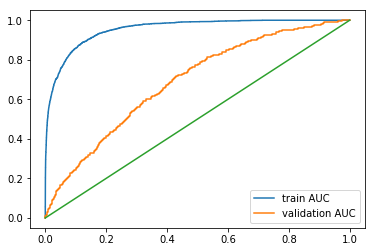

In [66]:
plot_roc_auc(model, X_train, X_val, y_train, y_val)

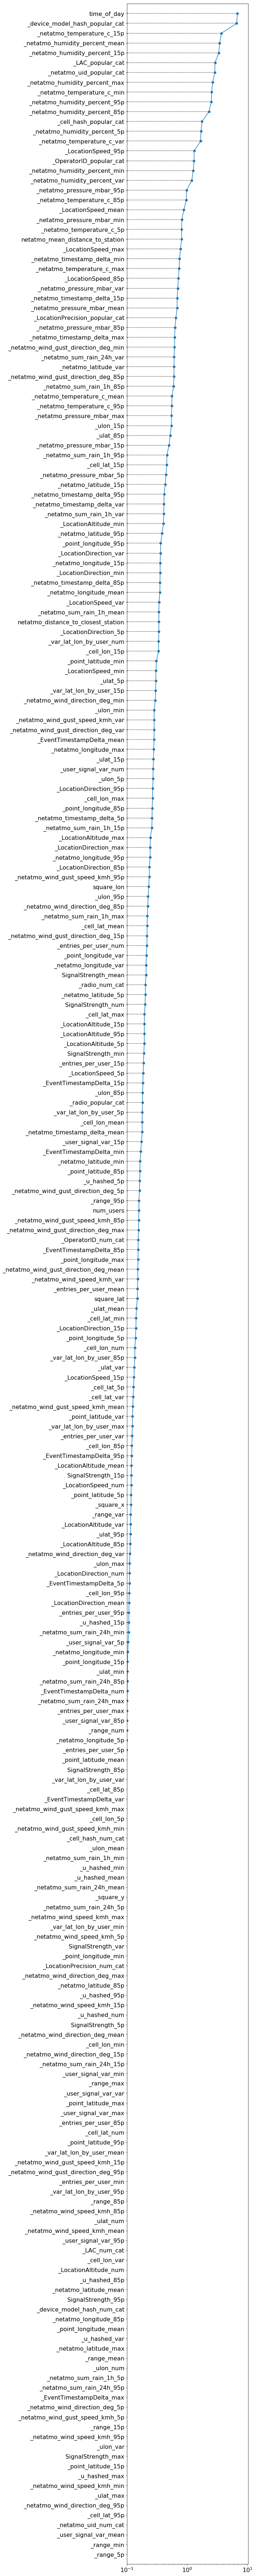

In [7]:
plot_feature_importances(model, X_train)

In [69]:
def stas_xgb(X_train, y_train, X_val, y_val=None):
    ytestxgb = np.zeros(X_val.shape[0])
    bgs = 3
    for bg in tqdm(range(bgs)):
        seed = bg + 1

#         model = CatBoostClassifier(random_seed=seed, thread_count=4) \
#                     .fit(X_train, y_train)
            
        model = CatBoostClassifier(iterations=1773,
                           loss_function='Logloss',
                           learning_rate=0.02,
                           thread_count=10,
                           l2_leaf_reg=10,
                           random_seed=seed) \
            .fit(X_train, y_train)
        
        ypredxgb = model.predict_proba(X_val)[:, 1]
        ytestxgb += ypredxgb
        
        if y_val is not None:
            print(bg, roc_auc_score(y_val, ytestxgb / (bg + 1.)), roc_auc_score(y_val, ypredxgb))
    
    ytestxgb /= bgs
    return ytestxgb    

## Final model and uploading the results

In [70]:
y_pred = stas_xgb(X, y, X_test)

A Jupyter Widget

In [71]:
# model = CatBoostClassifier().fit(X, y)
# y_pred = model.predict_proba(X_test)[:,1]

In [72]:
prediction_for_one_city = test_block_ids.copy()
prediction_for_one_city["prediction"] = y_pred
prediction_for_one_city.to_csv("./intermediate_data/catboost_{}.csv".format(CITY))

prediction_for_one_city.head()

,city_code,sq_x,sq_y,hour_hash,prediction
0,78,-14,-1,3349487805510353524,0.049262
1,78,-5,19,4403871403275781824,0.120593
2,78,-2,-15,8792171690991786686,0.116950
3,78,-3,3,7736833985638062288,0.040544
4,78,0,-19,3088439934333900884,0.095126


In [73]:
df_kazan, df_spb, df_msk = [pd.read_csv(fname,index_col=0) for fname in ("./intermediate_data/catboost_kazan.csv",
                                                  "./intermediate_data/catboost_spb.csv",
                                                  "./intermediate_data/catboost_msk.csv")]
predictions = pd.concat(
    [df_kazan, df_spb, df_msk],
    ignore_index=True
)
blocks = pd.read_csv("./data/raw/data/hackathon_tosubmit.tsv",sep='\t')
assert len(predictions) == len(blocks),"Predictions don't match blocks. Sumbit at your own risk."

merged = pd.merge(blocks,predictions,how='left',on=["sq_x","sq_y","hour_hash"])
assert not np.isnan(merged.prediction).any(), "some predictions are missing. Sumbit at your own risk."

In [74]:
merged[['id','prediction']].to_csv("catboost_submission.csv",sep=',',index=False,header=False)

In [75]:
!head catboost_submission.csv

1,0.031634609144192104
2,0.03284259193837321
3,0.04364392762488191
4,0.02839503778376116
5,0.039972046450584144
6,0.046092420907015416
7,0.01543400958090537
8,0.05029592922189692
9,0.09204997425080656
10,0.03200676983856063
